# KNN（K近邻）

## K - 取样数；NN - 距离计算（eg. 欧拉距离）

## 一、KNN介绍

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [
    [3.3935, 2.3312],
    [3.1101, 1.7815],
    [1.3438, 3.3684],
    [3.5823, 4.6792],
    [2.2804, 2.8670],
    [7.4234, 4.6965],
    [5.7451, 3.5340],
    [9.1722, 2.5111],
    [7.7928, 3.4241],
    [7.9398, 0.7916]
]
raw_data_Y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
x_train = np.array(raw_data_X)
y_train = np.array(raw_data_Y)

In [4]:
x_train

array([[3.3935, 2.3312],
       [3.1101, 1.7815],
       [1.3438, 3.3684],
       [3.5823, 4.6792],
       [2.2804, 2.867 ],
       [7.4234, 4.6965],
       [5.7451, 3.534 ],
       [9.1722, 2.5111],
       [7.7928, 3.4241],
       [7.9398, 0.7916]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

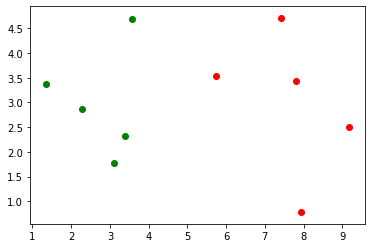

In [6]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], color='g')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color='r')
plt.show()

In [7]:
x = np.array([8.0936, 3.3657])

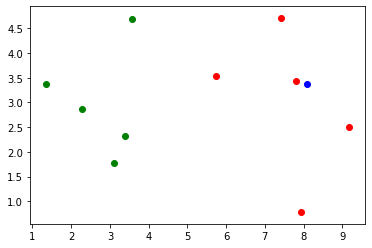

In [8]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], color='g')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

### KNN的过程

In [9]:
from math import sqrt
distances = []
for x_ele in x_train:
    d = sqrt(np.sum((x_ele - x)**2))
    distances.append(d)

In [10]:
distances

[4.81260119478022,
 5.229241043401997,
 6.749800540015979,
 4.698628516918528,
 5.834551904816684,
 1.4900324425998253,
 2.354522698977439,
 1.3761246745843922,
 0.30641670972713025,
 2.578690607653427]

In [11]:
distances = [sqrt(np.sum((x_ele - x) ** 2)) for x_ele in x_train]

In [12]:
distances

[4.81260119478022,
 5.229241043401997,
 6.749800540015979,
 4.698628516918528,
 5.834551904816684,
 1.4900324425998253,
 2.354522698977439,
 1.3761246745843922,
 0.30641670972713025,
 2.578690607653427]

In [13]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [14]:
nearest = np.argsort(distances)
k = 6

In [15]:
topK_y = [y_train[i] for i in nearest[:k]]

In [16]:
topK_y

[1, 1, 1, 1, 1, 0]

In [17]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [18]:
votes = Counter(topK_y)

In [19]:
votes.most_common(2)

[(1, 5), (0, 1)]

In [20]:
votes.most_common(1)[0][0]

1

In [21]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

### KNN的说明

##### K近邻算法是非常特殊的，可以被认为是没有模型的算法，为和其他算法统一，可以认为训练数据集就是模型本身

### 使用scikit-learn中的KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [24]:
kNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [25]:
x_predict = x.reshape(1, -1)
kNN_classifier.predict(x_predict)

array([1])

In [26]:
y_predict = kNN_classifier.predict(x_predict)
y_predict[0]

1

### 使用自己的KNN算法

In [27]:
%run D://资料//程序//Python//Machine_Learn//KNN//knn_classifier.py

In [28]:
knn_clf = KNNClassifier(k=6)

In [29]:
knn_clf.fit(x_train, y_train)

KNN(k=6)

In [30]:
y_predict = knn_clf.predict(x_predict)

In [31]:
y_predict

array([1])

In [32]:
y_predict[0]

1

# 二、训练集和测试集拆分

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [34]:
iris = datasets.load_iris()

In [35]:
X = iris.data
y = iris.target

In [36]:
X.shape

(150, 4)

In [37]:
y.shape

(150,)

## train_test_split

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
shuffle_indexes = np.random.permutation(len(X))

In [40]:
shuffle_indexes

array([ 17, 123,  22,  97, 132, 111,  67,  11,  84,  16,  74,  44,  64,
         3, 143, 105,  68, 100, 140, 135, 114,  39,  30,  53,  25,  71,
        86, 108, 128,  31,  78,  79, 127,  88, 117, 129,  13,  35, 103,
         2,  90,  15, 104, 116,   7, 118,  72,   9,  36,  51,  45,  49,
       136, 125,  32,  52,  48,   4, 131,  18,  28,  29,  33,  62, 112,
       145,  34,  20,  57,  87,  69, 148, 138,  23,   0,  43, 119,  83,
       109,   5,  26, 146,  61,  50,  42,  19, 139,  65,  46,  91, 147,
       141, 107,   1, 137,  93,  77, 149, 130,  58,  56, 106, 144, 121,
        70,   6, 101,  76,  98, 102,  99, 110,  55,  40,  82, 115,  94,
        37,  21,  75,  12,  60, 133,  47,  73,  38,  41, 122,  96, 120,
         8,  63, 124,  14,  27,  24,  81,  54,  92,  66, 113,  10, 134,
       142,  95,  59,  85, 126,  80,  89])

In [41]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [42]:
test_size

30

In [43]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [44]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [45]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [46]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


### 使用自己的train_test_split算法

In [47]:
%run D://资料//程序//Python//Machine_Learn//Preprocess//model_selection.py

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [50]:
my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [51]:
y_predict = my_knn_clf.predict(X_test)

In [52]:
y_predict

array([2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 1, 2, 0, 0])

In [53]:
y_test

array([2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 1, 2, 0, 0])

In [54]:
np.sum(y_predict == y_test)

30

In [55]:
np.sum(y_predict == y_test) / len(y_test)

1.0

### sklearn中的train_test_split算法

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [59]:
kNN_classifier.fit(X_train, y_train)
y_predict = kNN_classifier.predict(X_test)
y_predict

array([1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 0, 0, 1, 1, 1, 2])

In [60]:
y_test

array([1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 0, 0, 1, 1, 2, 2])

In [63]:
np.sum(y_predict == y_test) / len(y_test)

0.9333333333333333

# 三、分类准确度

In [64]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [65]:
digits = datasets.load_digits()

In [66]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [67]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [68]:
X = digits.data
X.shape

(1797, 64)

In [69]:
y = digits.target
y.shape

(1797,)

In [70]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [72]:
X[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [73]:
some_digit = X[666]

In [74]:
y[666]

0

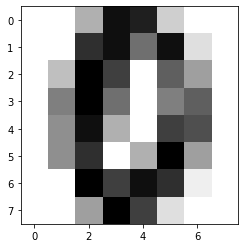

In [75]:
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [76]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
my_knn_clf = KNNClassifier(k=3)

In [78]:
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [79]:
y_predict = my_knn_clf.predict(X_test)
y_predict

array([5, 6, 9, 2, 6, 9, 0, 4, 4, 5, 6, 0, 2, 0, 9, 5, 2, 6, 8, 1, 9, 1,
       3, 4, 2, 8, 5, 6, 2, 1, 0, 3, 9, 3, 9, 3, 9, 9, 6, 7, 5, 0, 3, 8,
       6, 8, 2, 0, 0, 5, 6, 7, 8, 4, 3, 1, 4, 1, 1, 7, 3, 3, 0, 7, 2, 0,
       8, 5, 6, 0, 6, 1, 5, 6, 1, 3, 7, 7, 6, 3, 3, 5, 0, 6, 9, 2, 6, 4,
       3, 0, 1, 0, 9, 2, 2, 9, 9, 5, 5, 7, 2, 9, 9, 3, 2, 7, 8, 9, 0, 1,
       2, 9, 7, 4, 2, 7, 6, 2, 6, 6, 1, 9, 6, 8, 4, 9, 0, 5, 4, 1, 3, 4,
       5, 0, 8, 4, 6, 7, 4, 2, 8, 3, 5, 1, 1, 4, 6, 2, 1, 0, 6, 6, 5, 9,
       4, 1, 9, 3, 0, 6, 7, 2, 2, 5, 0, 4, 4, 7, 1, 4, 6, 4, 1, 9, 9, 3,
       8, 5, 2, 9, 2, 8, 6, 1, 5, 3, 5, 8, 8, 6, 5, 8, 3, 0, 2, 3, 3, 3,
       8, 0, 0, 2, 3, 1, 2, 3, 3, 6, 9, 5, 9, 8, 8, 0, 3, 4, 8, 1, 6, 4,
       7, 8, 2, 8, 1, 1, 2, 6, 7, 9, 8, 5, 6, 4, 7, 9, 1, 1, 6, 0, 6, 2,
       3, 6, 7, 7, 6, 3, 4, 9, 5, 5, 1, 9, 4, 1, 0, 2, 1, 0, 9, 9, 7, 1,
       3, 4, 6, 0, 3, 6, 3, 7, 6, 4, 4, 3, 4, 6, 9, 7, 0, 5, 7, 1, 5, 6,
       9, 4, 5, 9, 5, 6, 1, 1, 2, 6, 4, 1, 3, 2, 0,

In [80]:
np.sum(y_predict == y_test) / len(y_test)

0.9888888888888889

In [81]:
%run D://资料//程序//Python//Machine_Learn//Metrics//metrics.py

In [82]:
accuracy_score(y_test, y_predict)

0.9888888888888889

In [83]:
my_knn_clf.score(X_test, y_test)

0.9888888888888889

### scikit-learn中的accuracy_score

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [88]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [89]:
y_predict = knn_clf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test, y_predict)

0.9916666666666667

In [92]:
knn_clf.score(X_test, y_test)

0.9916666666666667

# 三、超参数

#### 超参数：在算法运行前需要决定的参数；
##### 模型参数：算法过程中学习的参数；

#### kNN算法没有模型参数，kNN算法中的k是典型的超参数。

### 寻找好的超参数（领域知识、经验数值、实验搜索）

#### 寻找最好的K

In [96]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("best_k =", best_k)
print("best_score =", best_score)

best_k = 5
best_score = 1.0


#### 考虑距离权重（距离倒数） or 不考虑距离

In [97]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ("uniform", "distance"):
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_method = method
            best_k = k
            best_score = score
        
print("best_method =", best_method)
print("best_k =", best_k)
print("best_score =", best_score)

best_method = uniform
best_k = 5
best_score = 1.0


#### 搜索明可夫斯基距离相应的p（明可夫斯基距离[p]：欧拉距离[p=2]、曼哈顿距离[p=1]）

In [99]:
%%time

best_p = -1
best_score = 0.0
best_k = -1
for k in range(1, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p
        
print("best_k =", best_k)
print("best_score =", best_score)
print("best_p =", best_p)

best_k = 5
best_score = 1.0
best_p = 2
Wall time: 30.2 s


### 网格搜索（Grid Search）

In [100]:
param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1, 6)]
    }
]

In [101]:
knn_clf = KNeighborsClassifier()

In [102]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [103]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 1min 30s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=4,
                     weights='distance')

In [105]:
grid_search.best_score_

0.9881654084397986

In [106]:
grid_search.best_params_

{'n_neighbors': 1, 'p': 4, 'weights': 'distance'}

In [107]:
knn_clf = grid_search.best_estimator_

In [108]:
knn_clf.score(X_test, y_test)

0.9944444444444445

In [110]:
%%time
# n_jobs 并行处理的分配核数，-1为全部核数; verbose 输出计算过程信息，值越大输出越详细
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.4s


Wall time: 35 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=4,
                                            weights='distance'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

#### 更多的距离定义：
#### 向量空间余弦相似度（Cosine Similarity）
#### 调整余弦相似度（Adjusted Cosine Similarity）
#### 皮尔森相关系数（Pearson Correlation Coefficient）
#### Jaccard相似系数（Jaccard Coefficient）

###  
## 四、数据归一化（Feature Scaling）

#### 解决方案：将所有的数据映射到同一尺度
#### 1、最值归一化（normalization）：把所有数据映射到0-1之间 scale = (x - min)/(max - min)
#### 适用于分布有明显边界的情况；受outlier影响较大

#### 2、均值方差归一化（standardization）：把所有数据归一到均值为0方差为1的分布中 scale = (x - mean)/standard
#### 适用于数据分布没有明显的边界；有可能存在极端数据值

In [113]:
import numpy as np
import matplotlib.pyplot as plt

#### 最值归一化（normalization）

In [116]:
x = np.random.randint(0, 100, size=100)

In [117]:
x

array([45, 72, 62, 77, 30, 64, 28, 72, 85, 34, 29, 17, 33, 32, 46, 35, 64,
       10, 70, 39, 37, 58, 60, 22, 32, 51, 79, 17, 92,  8,  8, 46, 48, 29,
       14, 88, 48, 54, 91, 70, 52, 16, 84, 97,  4, 85,  9, 98, 54, 82, 89,
        6, 15, 28, 65, 25, 46, 82,  5, 92, 22, 29, 26, 63, 84, 72, 61, 64,
       14,  6,  5, 15, 31, 65, 94, 26, 24, 49, 32, 99, 49, 48, 93, 27, 89,
       10, 49, 36, 21,  9, 33, 27, 37, 55, 83, 20, 89, 70, 26,  7])

In [118]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.43157895, 0.71578947, 0.61052632, 0.76842105, 0.27368421,
       0.63157895, 0.25263158, 0.71578947, 0.85263158, 0.31578947,
       0.26315789, 0.13684211, 0.30526316, 0.29473684, 0.44210526,
       0.32631579, 0.63157895, 0.06315789, 0.69473684, 0.36842105,
       0.34736842, 0.56842105, 0.58947368, 0.18947368, 0.29473684,
       0.49473684, 0.78947368, 0.13684211, 0.92631579, 0.04210526,
       0.04210526, 0.44210526, 0.46315789, 0.26315789, 0.10526316,
       0.88421053, 0.46315789, 0.52631579, 0.91578947, 0.69473684,
       0.50526316, 0.12631579, 0.84210526, 0.97894737, 0.        ,
       0.85263158, 0.05263158, 0.98947368, 0.52631579, 0.82105263,
       0.89473684, 0.02105263, 0.11578947, 0.25263158, 0.64210526,
       0.22105263, 0.44210526, 0.82105263, 0.01052632, 0.92631579,
       0.18947368, 0.26315789, 0.23157895, 0.62105263, 0.84210526,
       0.71578947, 0.6       , 0.63157895, 0.10526316, 0.02105263,
       0.01052632, 0.11578947, 0.28421053, 0.64210526, 0.94736

In [119]:
X = np.random.randint(0, 100, (50, 2))

In [120]:
X[:10, :]

array([[27, 32],
       [99, 42],
       [ 6,  9],
       [20, 26],
       [65, 60],
       [86, 67],
       [13, 69],
       [65, 74],
       [ 0,  5],
       [23, 46]])

In [121]:
X = np.array(X, dtype=float)

In [122]:
X[:10, :]

array([[27., 32.],
       [99., 42.],
       [ 6.,  9.],
       [20., 26.],
       [65., 60.],
       [86., 67.],
       [13., 69.],
       [65., 74.],
       [ 0.,  5.],
       [23., 46.]])

In [123]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

In [124]:
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

In [125]:
X[:10,:]

array([[0.27272727, 0.32954545],
       [1.        , 0.44318182],
       [0.06060606, 0.06818182],
       [0.2020202 , 0.26136364],
       [0.65656566, 0.64772727],
       [0.86868687, 0.72727273],
       [0.13131313, 0.75      ],
       [0.65656566, 0.80681818],
       [0.        , 0.02272727],
       [0.23232323, 0.48863636]])

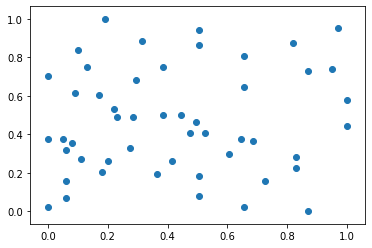

In [126]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [127]:
np.mean(X[:,0])

0.42767676767676766

In [128]:
np.std(X[:,0])

0.30129205153188865

In [129]:
np.mean(X[:,1])

0.46772727272727266

In [130]:
np.std(X[:,1])

0.27120179428451524

#### 均值方差归一化（standardization）

In [131]:
X2 = np.random.randint(0, 100, (50, 2))

In [132]:
X2 = np.array(X2, dtype=float)

In [133]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])

In [134]:
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])

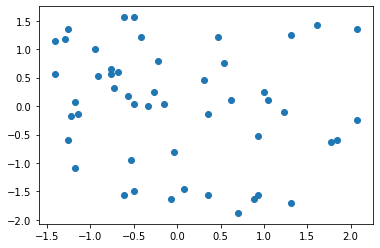

In [135]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [136]:
np.mean(X2[:,0])

-1.509903313490213e-16

In [137]:
np.std(X2[:,0])

1.0

In [138]:
np.mean(X2[:,1])

2.7755575615628914e-17

In [139]:
np.std(X2[:,1])

0.9999999999999999

### Scikit-learn中的Scaler

In [141]:
import numpy as np
from sklearn import datasets

In [142]:
iris = datasets.load_iris()

In [143]:
X = iris.data
y = iris.target

In [144]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Scikit-learn中的StandardScaler

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
standardScaler = StandardScaler()

In [148]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [149]:
standardScaler.mean_

array([5.85916667, 3.0775    , 3.7625    , 1.20833333])

In [150]:
standardScaler.scale_

array([0.79765237, 0.43233137, 1.72375861, 0.75206198])

In [151]:
standardScaler.transform(X_train)

array([[ 0.55266348, -0.4105647 ,  1.06598452,  0.78672594],
       [-0.57564759,  0.74595558, -1.19651324, -1.34075829],
       [ 1.05413506, -1.33578092,  1.18201005,  0.78672594],
       [ 0.30192768, -0.17926064,  0.48585689,  0.25485488],
       [ 1.43023875,  0.28334747,  0.54386965,  0.25485488],
       [-0.57564759, -0.17926064,  0.42784413,  0.38782265],
       [ 0.55266348, -0.87317281,  0.65989518,  0.78672594],
       [ 1.30487086,  0.28334747,  1.12399729,  1.45156476],
       [-0.95175128,  0.97725963, -1.37055153, -1.20779052],
       [ 1.17950296, -0.64186875,  0.60188242,  0.25485488],
       [ 0.92876717, -0.4105647 ,  0.48585689,  0.12188712],
       [-0.95175128,  1.43986774, -1.31253877, -1.07482276],
       [ 0.30192768, -0.17926064,  0.65989518,  0.78672594],
       [-0.1995439 , -0.4105647 ,  0.25380584,  0.12188712],
       [ 1.05413506,  0.05204341,  0.36983136,  0.25485488],
       [ 2.30781403, -0.17926064,  1.35604834,  1.45156476],
       [-1.70395866, -1.

In [152]:
X_train

array([[6.3, 2.9, 5.6, 1.8],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [6.1, 3. , 4.6, 1.4],
       [7. , 3.2, 4.7, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [6.9, 3.2, 5.7, 2.3],
       [5.1, 3.5, 1.4, 0.3],
       [6.8, 2.8, 4.8, 1.4],
       [6.6, 2.9, 4.6, 1.3],
       [5.1, 3.7, 1.5, 0.4],
       [6.1, 3. , 4.9, 1.8],
       [5.7, 2.9, 4.2, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [4.5, 2.3, 1.3, 0.3],
       [6. , 2.2, 5. , 1.5],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 3. , 4.8, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [6.3, 2.5, 4.9, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5.8, 2.7, 5.1, 1.9],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [6.3, 2.3, 4.4, 1.3],
       [6.5, 3.2, 5.1, 2. ],
       [4.9, 2.4, 3.3, 1. ],
       [5.2, 4.1, 1.5, 0.1],
       [5. , 3.3, 1.4, 0.2],
       [4.8, 3

In [153]:
X_train = standardScaler.transform(X_train)

In [154]:
X_train

array([[ 0.55266348, -0.4105647 ,  1.06598452,  0.78672594],
       [-0.57564759,  0.74595558, -1.19651324, -1.34075829],
       [ 1.05413506, -1.33578092,  1.18201005,  0.78672594],
       [ 0.30192768, -0.17926064,  0.48585689,  0.25485488],
       [ 1.43023875,  0.28334747,  0.54386965,  0.25485488],
       [-0.57564759, -0.17926064,  0.42784413,  0.38782265],
       [ 0.55266348, -0.87317281,  0.65989518,  0.78672594],
       [ 1.30487086,  0.28334747,  1.12399729,  1.45156476],
       [-0.95175128,  0.97725963, -1.37055153, -1.20779052],
       [ 1.17950296, -0.64186875,  0.60188242,  0.25485488],
       [ 0.92876717, -0.4105647 ,  0.48585689,  0.12188712],
       [-0.95175128,  1.43986774, -1.31253877, -1.07482276],
       [ 0.30192768, -0.17926064,  0.65989518,  0.78672594],
       [-0.1995439 , -0.4105647 ,  0.25380584,  0.12188712],
       [ 1.05413506,  0.05204341,  0.36983136,  0.25485488],
       [ 2.30781403, -0.17926064,  1.35604834,  1.45156476],
       [-1.70395866, -1.

In [155]:
X_test_standard = standardScaler.transform(X_test)

In [156]:
X_test_standard

array([[-0.82638338, -0.87317281,  0.07976755,  0.25485488],
       [-1.07711918,  0.97725963, -1.42856429, -1.20779052],
       [ 1.68097455, -0.17926064,  1.18201005,  0.52079041],
       [-1.20248707,  0.05204341, -1.31253877, -1.47372605],
       [-1.07711918, -2.4923012 , -0.1522835 , -0.27701618],
       [-1.57859076,  0.74595558, -1.37055153, -1.20779052],
       [ 0.67803137, -0.87317281,  0.89194623,  0.9196937 ],
       [ 0.30192768, -0.4105647 ,  0.54386965,  0.25485488],
       [-0.95175128,  1.6711718 , -1.08048771, -1.07482276],
       [-0.1995439 , -0.17926064,  0.25380584, -0.01108065],
       [-1.07711918,  0.97725963, -1.254526  , -0.80888723],
       [ 0.55266348,  0.74595558,  1.06598452,  1.58453252],
       [ 1.93171034, -0.64186875,  1.35604834,  0.9196937 ],
       [-1.32785497, -0.17926064, -1.37055153, -1.47372605],
       [-0.07417601,  2.13377991, -1.48657706, -1.34075829],
       [-1.82932656, -0.4105647 , -1.37055153, -1.34075829],
       [ 0.17655979, -2.

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [159]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [160]:
knn_clf.score(X_test_standard, y_test)

0.9666666666666667

In [162]:
knn_clf.score(X_test, y_test)

0.36666666666666664

## 五、总结

### k近邻算法总结

#### 1、解决问题：
#### （1）解决分类问题（天然可以解决多分类问题），思想简单，效果强大
#### （2）解决回归问题（最近k个节点对应值的平均值，可以考虑加权平均），sklearn KNeighborsRegressor
#### 2、存在缺点：
#### （1）效率低下（训练集m个样本，n个特征，则预测每一个新的数据需要O(m*n)），使用树结构（KD-Tree、Ball-Tree）优化
#### （2）高度数据相关
#### （3）预测结果不具有可解释性
#### （4）维数灾难（随着维度的增加，看似相近的两个点之间的距离越来越大），解决方法：降维

### 机器学习（kNN）流程

#### 1、数据集划分（训练数据集、测试数据集）
#### 2、数据归一化（训练数据和测试数据均需Scaler）
#### 3、模型训练
#### 4、模型预测（分类准确度accuracy）
#### 5、使用网格搜索寻找最好的超参数

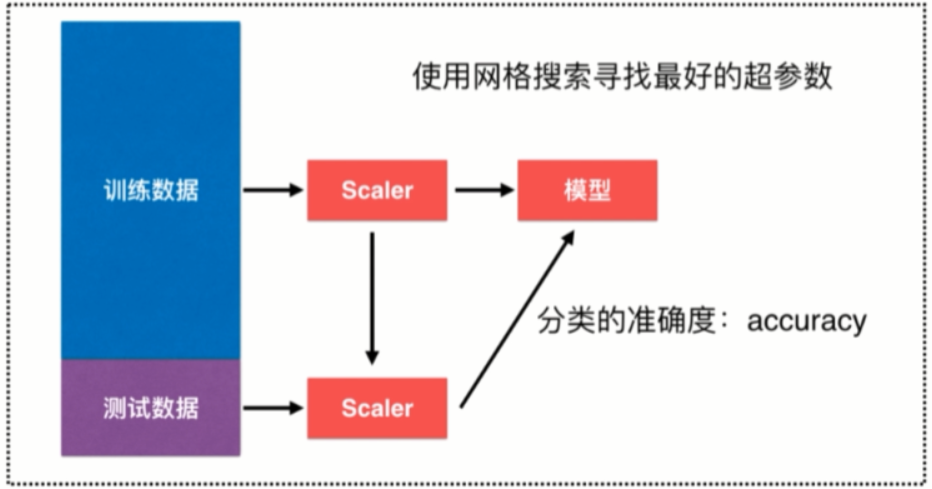